#  Aula 3.3 - Correlação

**Objetivo:** 
*   Aprofundarmos no estudo de uma característica ou comportamento no qual iremos  desenvolver varias técnicas e estudos que embasarão os modelos a serem usados durante o curso. 

**O que você será capaz de fazer após a aula:**
*   Entender este comportamento, o que ele significa, suas implicações e variações.

## Coeficiente de Pearson e Spearman

### Dados Simulados

In [1]:
## Simulando um dataset

import numpy as np
import pandas as pd

# Dados aleatórios
data_1 = np.random.randn(1, 20)
data_2 = np.random.randn(1, 20)
data_3 = np.random.randn(1, 20)
data_4 = np.random.randn(1, 20)

data = {"Column 1":data_1[0], 
        "Column 2":data_2[0], 
        "Column 3":data_3[0], 
        "Column 4":data_4[0]}

# Dataframe com todas as colunas
df = pd.DataFrame(data)
df

,Column 1,Column 2,Column 3,Column 4
0,-0.097834,-1.694574,0.007277,-1.379230
1,-1.255646,-2.356441,-0.772490,-1.010693
2,0.232684,-0.817117,-1.655855,0.849381
3,-0.078816,0.806889,0.680059,1.955957
4,0.451033,0.468145,0.352325,0.054540
5,-0.830795,0.432205,-1.239468,-0.568226
6,-0.311126,1.980661,1.176853,0.488537
7,2.075314,-0.198020,1.476137,1.264188
8,-0.895524,0.039528,-0.509841,-2.000132
9,0.032577,0.725513,2.103193,-0.348638


In [ ]:
# .corr() pode calcular as correlações de 'pearson', 'kendall', 'spearman'.
print(df.corr(method='spearman'))

          Column 1  Column 2  Column 3  Column 4
Column 1  1.000000  0.157895 -0.287218 -0.055639
Column 2  0.157895  1.000000 -0.027068  0.273684
Column 3 -0.287218 -0.027068  1.000000 -0.362406
Column 4 -0.055639  0.273684 -0.362406  1.000000


### Dataset Câncer de Mama

In [ ]:
## Dataset

from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer = load_breast_cancer()
data = breast_cancer.data
features = breast_cancer.feature_names

cm = pd.DataFrame(data, columns = features)
cm

#print(cm.shape)
print(features)

In [ ]:
print(features)

In [ ]:
# Pegando apenas as 6 primeiras colunas
cm_small = cm.iloc[:,:6]

# Vendo a correlação pelo método de ???
print(cm_small.corr(method='pearson'))

## Teste Qui-Quadrado




### DataSet Escola/Nota

**Contexto**

Uma amostra de alunos foi aleatoriamente selecionada de escolas privadas e públicas e a nota da prova do vestibular de cada um foi anotada. Os dados observados são apresentados na tabela de contigência abaixo.

| Escola/Nota | 0-275 | 276-350 | 351-425 | 426-500 |
|--- |--- |--- |--- |--- |
| **Pública**| 6* | 14 | 17 | 9 | 
| **Particular** | 30 | 32 | 17 | 3 |

*6 alunos da escola pública obtiveram nota da prova no intervalo de 0-275.

**Hipóteses**

*   $H_0$: Escola e Nota são independentes (não são associados), "não há relação entre as variáveis".
*   $H_1$: Escola e Nota são dependentes (são associados).

*Mais infos. sobre a teoria do Teste Qui-quadrado [aqui](https://acervolima.com/python-teste-qui-quadrado-de-pearson/#:~:text=A%20hip%C3%B3tese%20estat%C3%ADstica%20do%20Qui,o%20m%C3%B3dulo%20SciPy%20do%20Python%20).*

*Sobre Tabelas de Contingência [aqui](https://www.statology.org/contingency-table-python/).*

In [ ]:
pip install scipy

In [ ]:
# A função chi2_contingency() do módulo scipy.stats toma como entrada a tabela de contingência 
# no formato de array 2d. Ele retorna uma tupla contendo estatísticas de teste, o valor p, 
# graus de liberdade e a tabela esperada (criada a partir dos valores calculados), nessa ordem. 
from scipy.stats import chi2_contingency

score = [[6, 14, 17,9], [30, 32, 17,3]]
stat, p, dof, expected = chi2_contingency(score) #Infos teóricas sobre cada parâmetro (stat, p...) no primeiro link "Teo sobre Qui-Qua"

In [ ]:
chi2_contingency(score)

In [ ]:
alpha = 0.05

print("O valor resultante do teste é: " + str(p))
if p <= alpha:
    print('Dependente (rejeita H0).')
else:
    print('Independente (não rejeita H0).')

O valor resultante do teste é: 0.0006172420545221026
Dependente (rejeita H0).


Rejeitamos $H_0$, há evidências de que a nota do aluno no vestibular depende da escola que ele frequenta.


### DataSet Cães e Gatos

**Contexto**

A tabela abaixo mostra o número de homens e mulheres que compram diferentes tipos de animais de estimação.

|  | Cão | Gato | Passáro | Total |
|--- |--- |--- |--- |--- |
| **Homens**| 207 | 282 | 241 | 730 | 
| **Mulheres** | 234 | 242 | 232 | 708 |
| **Total** | 441 | 524 | 473 | 1438 |


**Hipóteses**

*   $H_0$: Gênero e tipo de animal de estimação são independentes (não são associados), "não há relação entre as variáveis".
*   $H_1$: Gênero e tipo de animal de estimação são dependentes (são associados).



In [ ]:
pip install scipy

In [ ]:
# A função chi2_contingency() do módulo scipy.stats toma como entrada a tabela de contingência 
# no formato de array 2d. Ele retorna uma tupla contendo estatísticas de teste, o valor p, 
# graus de liberdade e a tabela esperada (criada a partir dos valores calculados), nessa ordem. 
from scipy.stats import chi2_contingency

tabela_de_dados = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(tabela_de_dados) #Infos teóricas sobre cada parâmetro (stat, p...) no primeiro link "Teo sobre Qui-Qua"

In [ ]:
chi2_contingency(tabela_de_dados)

In [ ]:
alpha = 0.05
 
print("O valor resultante do teste é: " + str(p))
if p <= alpha:
    print('Dependente (rejeita H0).')
else:
    print('Independente (não rejeita H0).')

O valor resultante do teste é: 0.1031971404730939
Independente (não rejeita H0).


___________ (Aceita/Rejeita)____________ $H_0$, ou seja, há evidências de que ____________________.





## Visualização Gráfica

### DataSet Iris

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

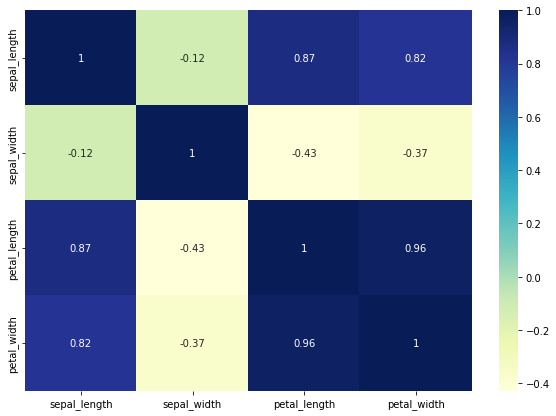

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

dataplot = sns.heatmap(iris.corr(), 
                      cmap="YlGnBu",
                      annot=True)

#### Gráfico de dispersão para todas as vars

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


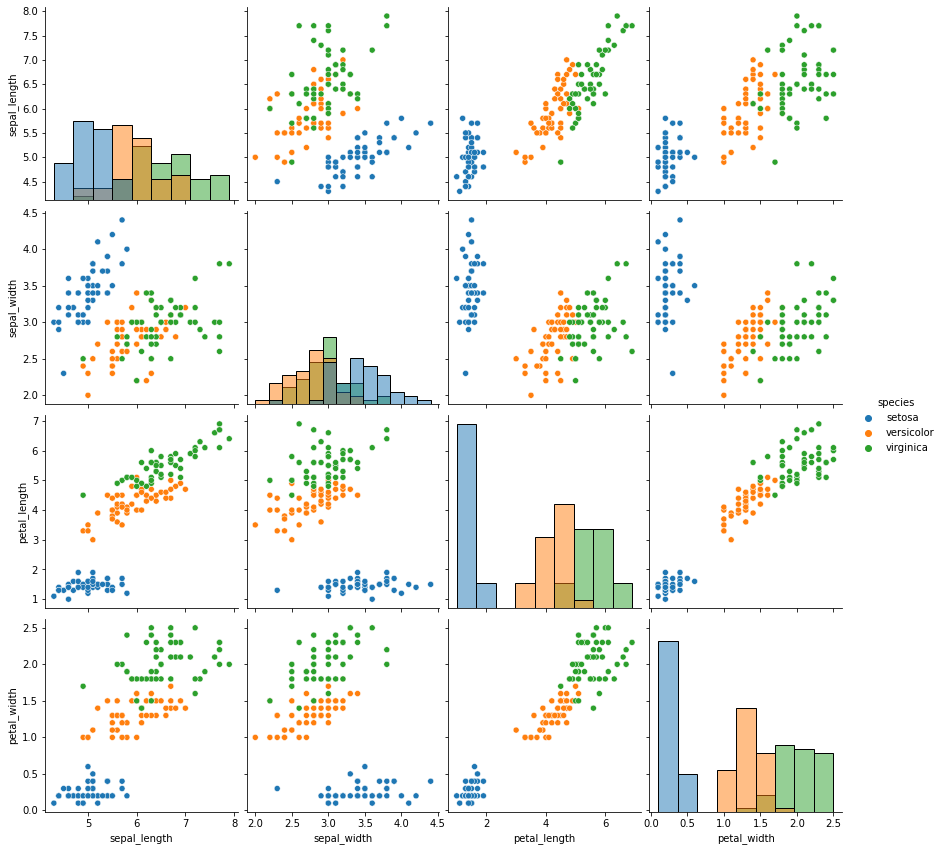

In [ ]:
sns.pairplot(iris, hue="species", size=3, diag_kind="hist");

#### Gráfico com: valor da corr., dispersão e densidade


In [ ]:
import numpy as np
from scipy.stats import pearsonr

In [ ]:
# Função para calcular o coeficiente de correlação de Pearson entre dois arrays
def corr_coef(x,y,label=None,color=None,**kwargs):
    
    # Calcula o valor
    r,p = pearsonr(x,y)
    
    # Adiciona o rótulo ao gráfico 
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

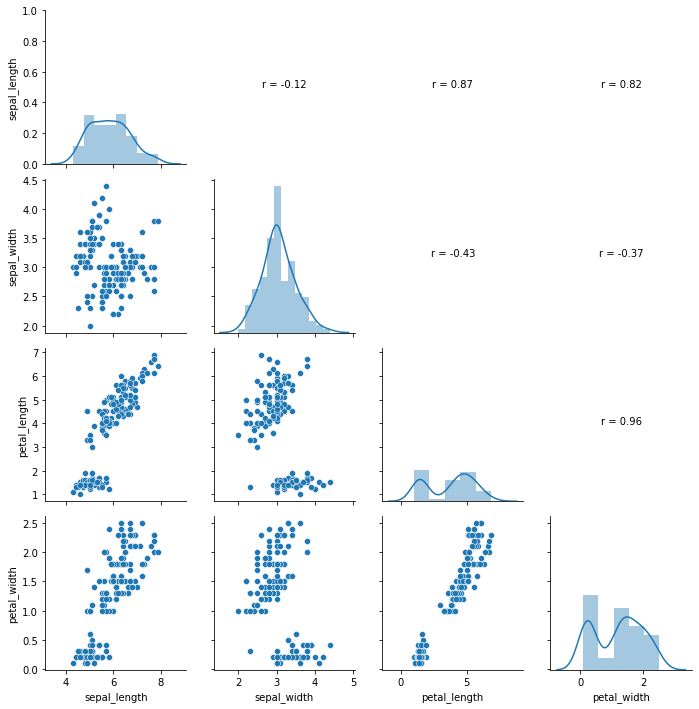

In [ ]:
g = sns.PairGrid(iris);

g.map_diag(sns.distplot);
g.map_lower(sns.scatterplot);
g.map_upper(corr_coef);

### DataSet Pinguins

Vendo como algumas variáveis indepedentes/preditoras que caracterizam um pinguim contidas no dataset de estudo se relacionam com a variável dependente/resposta *Massa corporal (body mass)* do mesmo.

*Mais infos sobre o dataset [aqui](https://www.analyticsvidhya.com/blog/2022/04/data-exploration-and-visualisation-using-palmer-penguins-dataset/) e [aqui](https://seaborn.pydata.org/generated/seaborn.pairplot.html).*

In [ ]:
pinguim = sns.load_dataset("penguins")
#pinguim

pinguim

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


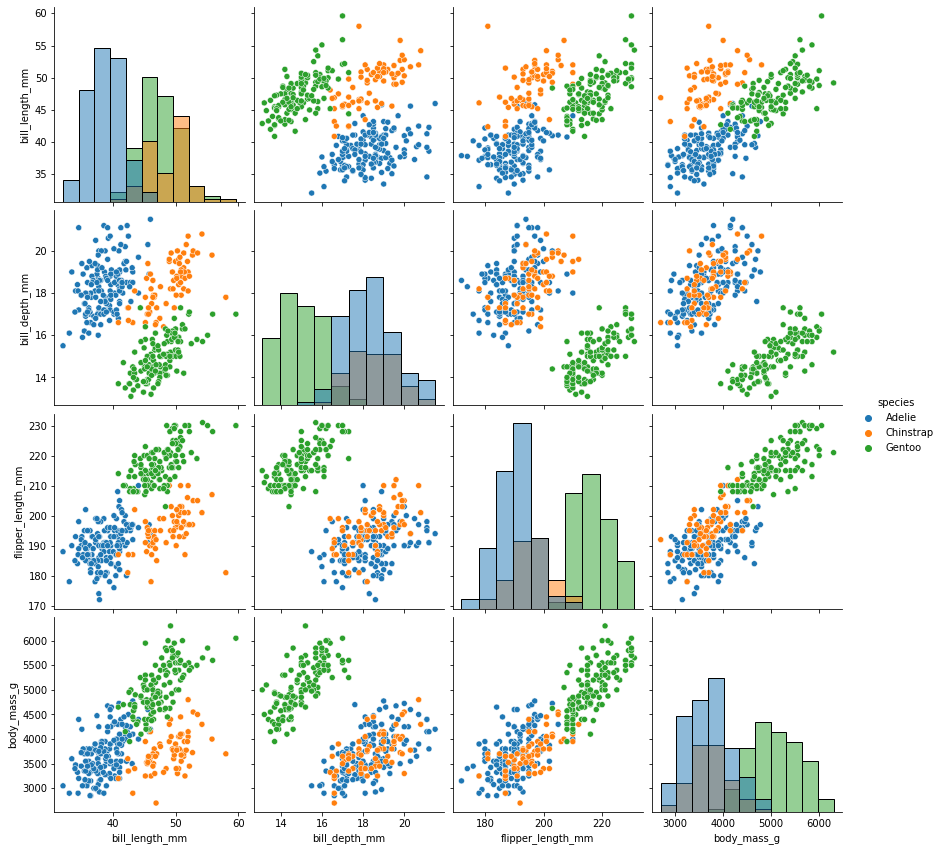

In [ ]:
import seaborn as sb

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

correlogram = sns.pairplot(pinguim, hue="species", size=3, diag_kind="hist");

In [ ]:
## Grafico de dispersão para todas as vars.
# Link para variações: https://seaborn.pydata.org/generated/seaborn.pairplot.html

